In [49]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import normaltest
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn, posthoc_conover
plt.rcParams['svg.fonttype'] = 'none'

# epineuralDF = pd.read_csv("epineural\\selectiveDF.csv")
# epineuralDF.loc[epineuralDF['binarySearchRes']==0.4,'binarySearchRes'] = 0.41
# epiTH = epineuralDF['Threshold (nC)']
# epiDR = epineuralDF['Dynamic Range (nC)']


epineuralDF = pd.read_csv("selectiveDF.csv")
epiTH = epineuralDF['Threshold (nC)']
epiDR = epineuralDF['Dynamic Range (nC)']

In [54]:
v1TH = epineuralDF[(epineuralDF['subject'] == 'Galactus') | (epineuralDF['subject'] == 'Hobgoblin')]['Threshold (nC)']
v2TH = epineuralDF[(epineuralDF['subject'] == 'HA02') | (epineuralDF['subject'] == 'HA04')]['Threshold (nC)']

v1DR = epineuralDF[(epineuralDF['subject'] == 'Galactus') | (epineuralDF['subject'] == 'Hobgoblin')]['Dynamic Range (nC)']
v2DR = epineuralDF[(epineuralDF['subject'] == 'HA02') | (epineuralDF['subject'] == 'HA04')]['Dynamic Range (nC)']

In [55]:
# threshold normality
alpha = 0.01
k, p1 = normaltest(v1TH) # len(penTH)

if p1 < alpha:  # null hypothesis: x comes from a normal distribution
    print("v1TH does not come from a normal distribution")
else:
    print("v1TH may be normal")

k, p2 = normaltest(v2TH) # len(epiTH)

if p2 < alpha:  # null hypothesis: x comes from a normal distribution
    print("v2TH does not come from a normal distribution")
else:
    print("v2TH may be normal")


v1TH may be normal
v2TH may be normal


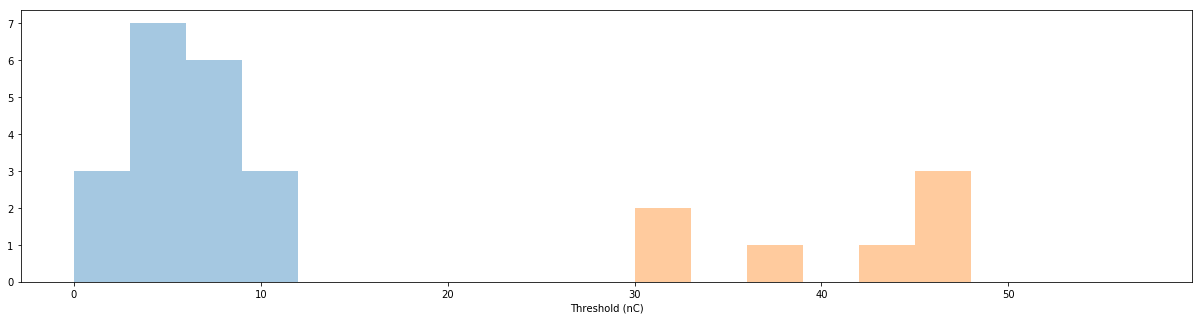

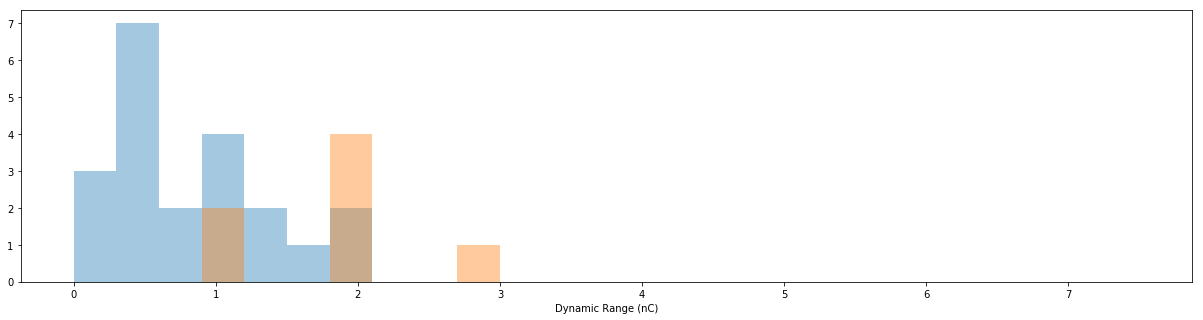

In [56]:
f,ax = plt.subplots(figsize=(21,5))
binSize = np.arange(0, max(v1TH), 3)
sns.distplot(v1TH,bins = binSize,kde = False)
# ax[0].set_title('Epineural thresholds')

binSize = np.arange(0, max(v2TH), 3)
sns.distplot(v2TH,bins = binSize,kde = False)
# ax[1].set_title('Penetrating thresholds')

f,ax2 = plt.subplots(figsize=(21,5))
binSize = np.arange(0, max(v1DR), 0.3)
sns.distplot(v1DR,bins = binSize,kde = False)
# ax2[0].set_title('v1 DR')

binSize = np.arange(0, max(v2DR), 0.3)
sns.distplot(v2DR,bins = binSize,kde = False)
# ax2[1].set_title('v2 DR')

In [57]:
k, p5 = kruskal(v1TH, v2TH)
print p5
if p5 < alpha:
    print("The difference between v1TH and v2TH is statistically significant")
else:
    print("not significant")

3.638489693157871e-05
The difference between v1TH and v2TH is statistically significant


In [48]:
k, p5 = kruskal(v1DR, v2DR)
print p5
if p5 < alpha:
    print("The difference between utahTH and FMATH is statistically significant")
else:
    print("not significant")

0.043704682620366614
not significant
